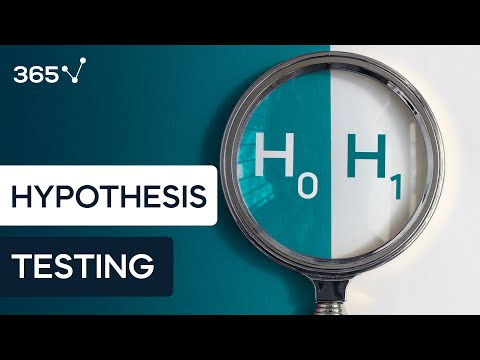

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

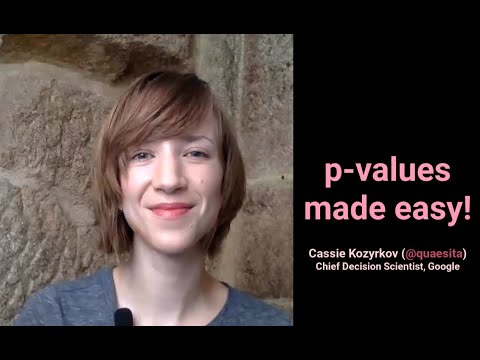

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

1. 
a. The key factor that makes the difference between ideas that can and cannot be examined and tested statistically is whether it is quantifiable. In order to analyze an idea statistically, it must involves numeric variables that can be measured. Only if there are quantifiable data available, can one apply statistical methods to analyze the data, thus draw an conclusion based on whatever pattern they found.

b. A well-formulated null hypothesis should follow these criterias:
I. It should be concise and clear, free of any ambiguity.
II. It should be quantifiable, as we would want to apply statistical methods to analyze it.
III. It should repressent the status quo, and assume there is no effect, no difference, or no relationship between the variables being tested. It should stand on a neutral position.
IV. It should refer to population parameters, instead of individual observations. 

c. The null hypothesis assumes that there are no effect, no difference, or no relationship between the variables introduced. It represents the status quo and takes the neutral stance (typically inclues equality). To reject the null hypothesis is often the purpose of statistical hypothesis testings. 
An alternative hypothesis is the direct contradiction of the null hypothesis, suggesting that there are certain effect, difference, or relationship between introduced variables. It is often the theory that researchers aims to support, and represents change or innovation. In order to support the alternative hypothesis, the null hypothesis needs to be rejected with enough evidence.

2. 
In hypothesis testing, 𝜇 represent the actual population mean, which is true but often unknown due different reasons (size of population being too large, population being dynamic and ever-changing or simply the population size being unknown). In order to find 𝜇, we come up with the null hypothesis, which assumes that 𝜇 = 𝜇0, with 𝜇0 being the hypothesized population mean. The null hypothesis is the statement that we would want to reject or prove during the hypothesis testing process. In order to prove or reject the null hypothesis, an alternative hypothesis is then brought up, which is the direct opposite of the null hypothesis. The goal of hypothesis testing is to find evidence to prove either hypothesis. In order to find evidence, we would resample from the original population with replacement. These datapoints will take the name of xi (i=1,2,3,4...n). We would then find the sample average for this sample and repeat the entire process for many times (often >1000 times). After that, we collect all the sample average and find the confidence interval (a range of values derived from sample data that is likely to contain the true population parameter). If 𝜇0 is within the interval, we have proven the null hypothesis, while if it isn't, then we have rejected the null hypothesis.

3. 
The logic of hypothesis testing is that we find evidence against a baseline assumption, which is the null hypothesis. The p-value can be understood as to what extent we can believe the null hypothesis, based on the observed data. In order to calculate a p-value, we are comparing the observed value from our bootstrapping process with the sampling distribution under the null hypothesis (normal distribution centered around the hypothesized parameter), thus we can conclude whether the null hypothesis is believable or ridiculous. 

4.
If we calculate a smaller p-value (typically <= 0.05), it means that the observed sample data are far from the center of the distribution, which is directly opposite to the case under null hypothesis, in which the distribution is most likely a normal distribution centered around the 𝜇0. A small p-value suggests that the observed test statistic is an extreme outlier (datapoints that are very far from the center) in the sampling distribution under the null hypothesis. Since these outliers are supposed to be very rare if the null hypothesis is right, it makes us question the validity of the null hypothesis. 

5.

In [5]:
import numpy as np

#Observed data
observed_right_turn = 80
sample_size = 124

#Simulate kiss turns under the null hypothesis (no tendency)
num_simulations = 10000
simulated_kiss = np.random.choice([0, 1], size = (num_simulations, sample_size), p = [0.5, 0.5])

#Calculate the proportions of right turns for each simulated sample
simulated_proportions = simulated_kiss.mean(axis = 1)

#Calculate the observed proportions
observed_proportions = observed_right_turn / sample_size

#Calculate p_value
p_value = np.mean(np.abs(simulated_proportions - 0.5) >= np.abs(observed_proportions - 0.5))

print("p-value:", p_value)

p-value: 0.0016


The p-value I got from simulation based p-value calculation for the null hypothesis relative to the available data is 0.0016, which suggests strong evidence against the null hypothesis. 

6.
It is not possible to definitely prove or disprove the null hypothesis using p-values. Even very low p-values only indicates that the sample data is very unlikely under the null hypothesis, not entirely impossible. Similarly, a high p-value only indicates that the sample data is very likely, but does not prove that the null hypothesis is true. There are two types of error in inferential statistics: Type I Error rejects the null hypothesis when it is actually true, while Type II Error fails to reject the null hypothesis when it is false. A low p-value reduces the risk of a type I error, but never eliminates it, while a high p-value can never reduce the risk of a type II error to 0. Therefore, Fido cannot be definitively proven innocent or guilty using a p-value, and no matter how high or low a p-value is, we can never use it as definitive evidence against or for the null hypothesis. 

7.

In [12]:
import pandas as pd

patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})
patient_data

patient_data['HealthScoreChange'] = patient_data.FinalHealthScore-patient_data.InitialHealthScore

print(pd.DataFrame({'HealthScoreChange': patient_data['HealthScoreChange'],
                    '> 0 ?': patient_data['HealthScoreChange']>0}))

random_difference_sign = np.random.choice([-1, 1], size=len(patient_data))
pd.DataFrame({'HealthScoreChange': random_difference_sign*patient_data['HealthScoreChange'].abs(),
              '> 0 ?': (random_difference_sign*patient_data['HealthScoreChange'])>0})

np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000  # experiment with this... what does this do?
n_size = len(patient_data)  # 10
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# generate "random improvement" proportions assuming H0 (vaccine has no average effect) is true 
# meaning that the "before and after" differences are positive or negative at "random"
for i in range(number_of_simulations):
    
    # why is this equivalent to the suggested idea above?
    random_improvement = np.random.choice([0,1], size=len(patient_data), replace=True)  # <<< `replace=True` ^^^

    # why is .mean() a proportion? 
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()

observed_statistic = (patient_data.HealthScoreChange>0).mean()
simulated_statistics = IncreaseProportionSimulations_underH0random

#The code above are all the same, here is where changes kick in
#Since for each one-sided test, we only have to consider one direction, so absolute values are unnecessary here. 


# One-sided test (greater than)
# Want to test: If the proportion of patients whose health improved is greater than what we would expect if the treatment had no effect
# Null hypothesis: The proportion of patients improving after treatment is less than or equal to the simulated value if the treatment had no effect (H0: p<=p0)
# Alternative hypothesis: The treatment increases the proportion of patients whose health improves (HA: p>p0)
SimStats_as_or_more_extreme_than_ObsStat = simulated_statistics >= observed_statistic

# Calculate the one-sided p-value
p_value = (SimStats_as_or_more_extreme_than_ObsStat).sum() / number_of_simulations

print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under H0)\n",
      'that are "as or more extreme" (greater) than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

# One-sided test (less than)
# Want to test: If the proportion of patients whose health improved is less than or equal to the simulated value if the treatment had no effect
# Null hypothesis: The proportion of patients improving after treatment is more than or equal to the simulated value if the treatment had no effect (H0: p>=p0)
#Alternative hypothesis: The treatment decreases the proportion of patients whose health improved (HA: p<p0)
SimStats_as_or_more_extreme_than_ObsStat = simulated_statistics <= observed_statistic

# Calculate the one-sided p-value
p_value = (SimStats_as_or_more_extreme_than_ObsStat).sum() / number_of_simulations

print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under H0)\n",
      'that are "as or more extreme" (less) than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

   HealthScoreChange  > 0 ?
0                  2   True
1                  8   True
2                 -3  False
3                  5   True
4                  3   True
5                  6   True
6                  7   True
7                 -3  False
8                  7   True
9                  1   True
Number of Simulations: 10000

Number of simulated statistics (under H0)
that are "as or more extreme" (greater) than the observed statistic: 565

p-value
(= simulations "as or more extreme" / total simulations): 0.0565
Number of Simulations: 10000

Number of simulated statistics (under H0)
that are "as or more extreme" (less) than the observed statistic: 9893

p-value
(= simulations "as or more extreme" / total simulations): 0.9893


From the result, we can see that the p-value of the first one sided test is 0.0565, which provides strong evidence against the first null hypothesis, and favors the alternative hypothesis. We can conclude that it is very likely that more patients are feeling better after the treatment and the treatment is effective.
We can also see that the p-value of the second one-sided test is 0.9893, which provides strong evidence for the second null hypothesis. We can conclude that it is very likely that more patients are feeling better after the treatment, which is the same as what we get from the first one-sided test.
The result of the one-sided tests are also in line with the original two-sided tests, which also results in the vaccine being effective. The one-sided tests provided further evidence to support the conclusion, as we examined each direction individually and find corresponding results. 

8.
Introduction: The famous Fisher's Tea Experiment is an excellent example of hypothesis testing used in the field of statistics. Today, a similar test is conducted on STA130 students and produced statistics for analysis. Before jumping into formal analysis, it would be nice to take a look at the relationship between two experiments. 

Some key similarities of the two tests include:
1. They both share the same null hypothesis (H0), which is that participants cannot actually differentiate between the two conditions (tea first vs. milk first) and are responding randomly.
2. Both experiments have a binary outcome (tea first or milk first). 

There are also differences between the two test cases:
1. Sample size: Fisher's tea experiment involves only 8 cup of tea, while the STA130 experiment involves a larger sample size of 80 random participants and 80 cups of tea.
2. Design: Fisher's tea experiment involves only one participant who tasted multiple cups of tea. While the STA130 experiment involves 80 random participants, who tastes one cup of tea each. STA130 experiment seems more credible, as some people might be very sensitive with such conditions, while others are not. Testing across multiple subjects eliminates such extremities. 

Null hypothesis (H0) for the experiment:
The proportion of students who can correctly identify each condition is 50%. (p = 0.5)

Null hypothesis explained:
I assume that participants cannot differentiate between the two conditions (tea first, milk first) and are guessing randomly. The proportion of correct answers by random guessing is 50%, which is exactly what I stated in the null hypothesis.

Alternative hypothesis (HA) for the experiment:
The proportion of students who can correctly identify each condition is not 50%. (p != 0.5)

Method:
In order to examine the validity of H0, I will implement two methods: p-value and confidence intervals.

P-value method (Binomial test):
Step 1: Simulate 10000 different answers assuming the null hypothesis is true (everyone is guessing randomly).
Step 2: Calculate proportion of correct guesses for the sample
Step 3: Calculate proportion of correct guesses for the actual data
Step 4: Calculate p-value from acquired statistics
Step 5: Use p-value to either support or reject the null hypothesis

Confidence interval method:
Step 1: Create 10000 different bootstrap samples from the actual data
Step 2: Draw histogram based on the proportion of correct answers in each bootstrapped sample
Step 3: Create a 95% confidence interval
Step 4: If 50% is within the interval, we have proven the null hypothesis. If 50% is not within the interval, we have rejected the null hypothesis

P-value method:

In [14]:
import numpy as np

#Observed data
observed_correct_answer = 49
sample_size = 80

#Simulate answers under the null hypothesis
num_simulations = 10000
simulated_answers = np.random.choice([0, 1], size = (num_simulations, sample_size), p = [0.5, 0.5])

#Calculate the proportions of correct answer for each simulated sample
simulated_proportions = simulated_answers.mean(axis = 1)

#Calculate the observed proportions
observed_proportions = observed_correct_answer / sample_size

#Calculate p_value
p_value = np.mean(np.abs(simulated_proportions - 0.5) >= np.abs(observed_proportions - 0.5))

print("p-value:", p_value)

p-value: 0.0444


P-value here means the probability of obtaining 49 or more correct answers out of 80, if the actual proportion of correct guesses is 50% (H0). A p-value of 0.0444 suggests a moderate evidence against the null hypothesis, which means that it is unlikely to obtain such result if the everyone is guessing randomly.

Confidence interval method:

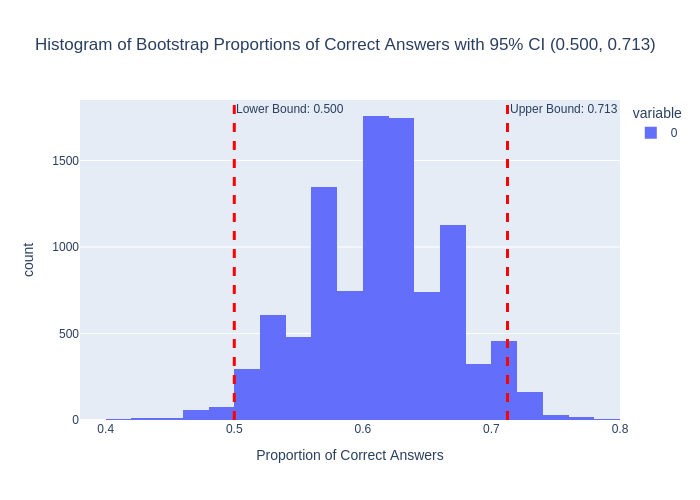

confidence interval: 
(0.5,0.7125
)


In [21]:
import numpy as np
import plotly.express as px

# Parameters of the STA130 experiment
n_students = 80  # number of students
observed_proportion = 49 / 80  # observed proportion of correct answers
n_bootstrap_samples = 10000  # number of bootstrap samples

# Generate 10,000 bootstrap samples
bootstrap_proportions = []
for _ in range(n_bootstrap_samples):
    sample = np.random.binomial(1, observed_proportion, n_students)
    bootstrap_proportion = np.mean(sample)
    bootstrap_proportions.append(bootstrap_proportion)

# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_proportions, 2.5)
upper_bound = np.percentile(bootstrap_proportions, 97.5)

# Create histogram using Plotly Express
fig = px.histogram(bootstrap_proportions, nbins=30, labels={'value': 'Proportion of Correct Answers'},
                   title=f"Histogram of Bootstrap Proportions of Correct Answers with 95% CI ({lower_bound:.3f}, {upper_bound:.3f})")

# Add vertical lines for the confidence interval
fig.add_vline(x=lower_bound, line_width=3, line_dash="dash", line_color="red", annotation_text=f"Lower Bound: {lower_bound:.3f}")
fig.add_vline(x=upper_bound, line_width=3, line_dash="dash", line_color="red", annotation_text=f"Upper Bound: {upper_bound:.3f}")

# Display the plot
fig.show(renderer="png")
print(f"confidence interval: \n({lower_bound},{upper_bound}\n)")

Based on 10000 bootstrapped samples, we have concluded a 95% confidence interval, which is (0.5, 0.725). This means that the actual proportion is very likely to fall within this interval. As our null hypothesis, 0.5, falls directly on the lower bound, it means that it is still plausible to be the actual value but represents the edge of what we believe the parameter could be. Comparing to values closer to the center of the interval, this value is less likely to be the actual parameter.

Conclusion:
Both method provides result that the null hypothesis is unlikely to be the actual parameter. Although we cannot definitively reject the null hypothesis, we can still conclude that it is unlikely that the proportion of students who can distinguish between the conditions is exactly 50%. It means that it is not likely that the students give their answers based solely on random guesses.  

Chatlogs:
1. https://chatgpt.com/share/670f56bb-60d0-8001-849c-3d0a06eaa371
2. https://chatgpt.com/share/670f56c8-4264-8001-9303-351d230f0273
3. https://chatgpt.com/share/670f5736-3a08-8001-a614-0cea903f2891
4. https://chatgpt.com/share/670f56ed-6c84-8001-9175-e8c8201c751e
5. https://chatgpt.com/share/670f5728-b884-8001-bf8a-04cf8cdf48d1
6. https://chatgpt.com/share/66ff86cb-8010-8001-9ad1-fdb4395c9357
7. https://chatgpt.com/share/670f570c-1028-8001-a03d-ef0b65a98df4